# Word Embeddings - word2vec, GloVe and Fasttext

In [1]:
import gensim
import gensim.downloader as api

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


from gensim.models import FastText as ft

### Word2Vec

In [10]:
#model_path = "word2vec/GoogleNews-vectors-negative300.bin"

# Load Google's pre-trained Word2Vec model.
#model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)  
#w2v = model.wv

#del model

word2vec_model_path = "word2vec-google-news-300"
word2vec_model = api.load(word2vec_model_path)
w2v = word2vec_model.wv

del word2vec_model

print(api.info(word2vec_model_path))

[==================================================] 100.0% 1662.8/1662.8MB downloaded
{'num_records': 3000000, 'file_size': 1743563840, 'base_dataset': 'Google News (about 100 billion words)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/word2vec-google-news-300/__init__.py', 'license': 'not found', 'parameters': {'dimension': 300}, 'description': "Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained using a simple data-driven approach described in 'Distributed Representations of Words and Phrases and their Compositionality' (https://code.google.com/archive/p/word2vec/).", 'read_more': ['https://code.google.com/archive/p/word2vec/', 'https://arxiv.org/abs/1301.3781', 'https://arxiv.org/abs/1310.4546', 'https://www.microsoft.com/en-us/research/publication/linguistic-regularities-in-continuous-space-word-repres

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [11]:
dog_vec = w2v["dog"]

# Distances from the word animal
animal_list = ["dog", "cat", "mouse", "hamster"]
animal_similarity = w2v.distances("animal", animal_list)
list(zip(animal_list, animal_similarity))

[('dog', 0.35619873),
 ('cat', 0.40923107),
 ('mouse', 0.69155),
 ('hamster', 0.5817574)]

## GloVe

In [17]:
# download model 
glove_model_path = "glove-wiki-gigaword-300"
glove_model = api.load(glove_model_path)
glove = glove_model.wv

del glove_model

print(api.info(glove_model_path))

[=================================================-] 99.9% 375.7/376.1MB downloaded
{'num_records': 400000, 'file_size': 394362229, 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py', 'license': 'http://opendatacommons.org/licenses/pddl/', 'parameters': {'dimension': 300}, 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).', 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.', 'read_more': ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf'], 'checksum': '29e9329ac2241937d55b852e8284e89b', 'file_name': 'glove-wiki-gigaword-300.gz', 'parts': 1}


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [18]:
glove.most_similar("policy",topn=10)

dog_vec = glove["dog"]

# Distances from the word animal
animal_list = ["dog", "cat", "mouse", "hamster"]
animal_similarity = glove.distances("animal", animal_list)
list(zip(animal_list, animal_similarity))

[('policies', 0.8036329746246338),
 ('strategy', 0.6325587034225464),
 ('stance', 0.5960066318511963),
 ('administration', 0.5948634147644043),
 ('economic', 0.5877833366394043),
 ('reform', 0.5807735919952393),
 ('change', 0.5785682201385498),
 ('decisions', 0.578339695930481),
 ('monetary', 0.5625897645950317),
 ('agenda', 0.5607941150665283)]

[('dog', 0.46835542),
 ('cat', 0.55863273),
 ('mouse', 0.647958),
 ('hamster', 0.84560686)]

## Fasttext

In [4]:
fasttext_model_path = "fasttext-wiki-news-subwords-300"
fasttext_model = api.load(fasttext_model_path)
fasttext = fasttext_model.wv

del fasttext_model

print(api.info(fasttext_model_path))

[==================================================] 100.0% 958.5/958.4MB downloaded


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
dog_vec = fasttext["dog"]

# Distances from the word animal
animal_list = ["dog", "cat", "mouse", "hamster"]
animal_similarity = fasttext.distances("animal", animal_list)
list(zip(animal_list, animal_similarity))

[('dog', 0.3773461),
 ('cat', 0.4444793),
 ('mouse', 0.5175402),
 ('hamster', 0.43007487)]

## Comparison

Useful functions to find word similarity and plot word embeddings using PCA. 

In [14]:
def plot_embeds(word_list, wv, title = None, word_embeddings = None, figsize = (12,7)) :
    # pca on the embedding
    pca = PCA(n_components=2)
    X = pca.fit_transform(wv[word_list])
    
    ax = plt.figure(figsize=figsize)
    ax.subplots()
    _ = plt.scatter(X[:,0], X[:,1])
    for label, point in list(zip(word_list, X)):
        _ = plt.annotate(label, (point[0] - 0.075, point[1] + 0.075))
    # Turn off tick labels
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
def find_most_similar (vec, wv, words = None) :
    # vec: resulting vector from word Arithmetic
    # words: list of words that comprise vec
    s = wv.similar_by_vector(vec, topn = 10)
    # filter out words like "king" and "man", or else they will be included in the similarity
    if (words != None) :
      word_sim = list(filter(lambda x: (x[0] not in words), s))[:3]
    else :
      return (s[:3])
    return (word_sim)

In [19]:
print ("word2vec: ")
find_most_similar(w2v["physics"] + w2v["biology"], w2v,
                  ["physics", "biology"])
print("GloVe:")
find_most_similar(glove["physics"] + glove["biology"], glove,
                  ["physics", "biology"])
print("fasttext:")
find_most_similar(fasttext["physics"] + fasttext["biology"], fasttext,
                  ["physics", "biology"])

print ("word2vec: Doctor - Man + Woman")
find_most_similar(w2v["doctor"] - w2v["man"] + w2v["woman"], w2v,
                  ["man", "doctor", "woman"])
print ("GloVe: Doctor - Man + Woman")
find_most_similar(glove["doctor"] - glove["man"] + glove["woman"], glove,
                  ["man", "doctor", "woman"])
print ("fasttext: Doctor - Man + Woman")
find_most_similar(fasttext["doctor"] - fasttext["man"] + fasttext["woman"], fasttext,
                  ["man", "doctor", "woman"])

print ("word2vec: Doctor - Woman + Man")
find_most_similar(w2v["doctor"] - w2v["woman"] + w2v["man"], w2v,
                  ["man", "doctors", "doctor", "woman"])
print ("GloVe: Doctor - Woman + Man")
find_most_similar(glove["doctor"] - glove["woman"] + glove["man"], glove,
                  ["man", "doctors", "doctor", "woman", "dr."])
print ("fasttext: Doctor - Woman + Man")
find_most_similar(fasttext["doctor"] - fasttext["woman"] + fasttext["man"], fasttext,
                  ["man", "doctors", "doctor", "woman", "dr."])


word2vec: 


[('biochemistry', 0.7291767001152039),
 ('science', 0.7232323288917542),
 ('biological_sciences', 0.6848379373550415)]

GloVe:


[('chemistry', 0.7815368175506592),
 ('mathematics', 0.7553216218948364),
 ('biochemistry', 0.7234476208686829)]

fasttext:


[('chemistry', 0.8087330460548401),
 ('science', 0.7965949773788452),
 ('biochemistry', 0.7960035800933838)]

word2vec: Doctor - Man + Woman


[('gynecologist', 0.7276507616043091),
 ('nurse', 0.6698512434959412),
 ('physician', 0.6674120426177979)]

GloVe: Doctor - Man + Woman


[('physician', 0.6203880906105042),
 ('nurse', 0.6161285638809204),
 ('doctors', 0.6017279624938965)]

fasttext: Doctor - Man + Woman


[('gynecologist', 0.6874127388000488),
 ('nurse-midwife', 0.6773605346679688),
 ('physician', 0.6561880111694336)]

word2vec: Doctor - Woman + Man


[('physician', 0.6823904514312744),
 ('surgeon', 0.5908077359199524),
 ('dentist', 0.570309042930603)]

GloVe: Doctor - Woman + Man


[('physician', 0.5128607153892517),
 ('he', 0.4661550223827362),
 ('brother', 0.46356332302093506)]

fasttext: Doctor - Woman + Man


[('physician', 0.6969557404518127),
 ('docter', 0.6826808452606201),
 ('non-doctor', 0.6698156595230103)]

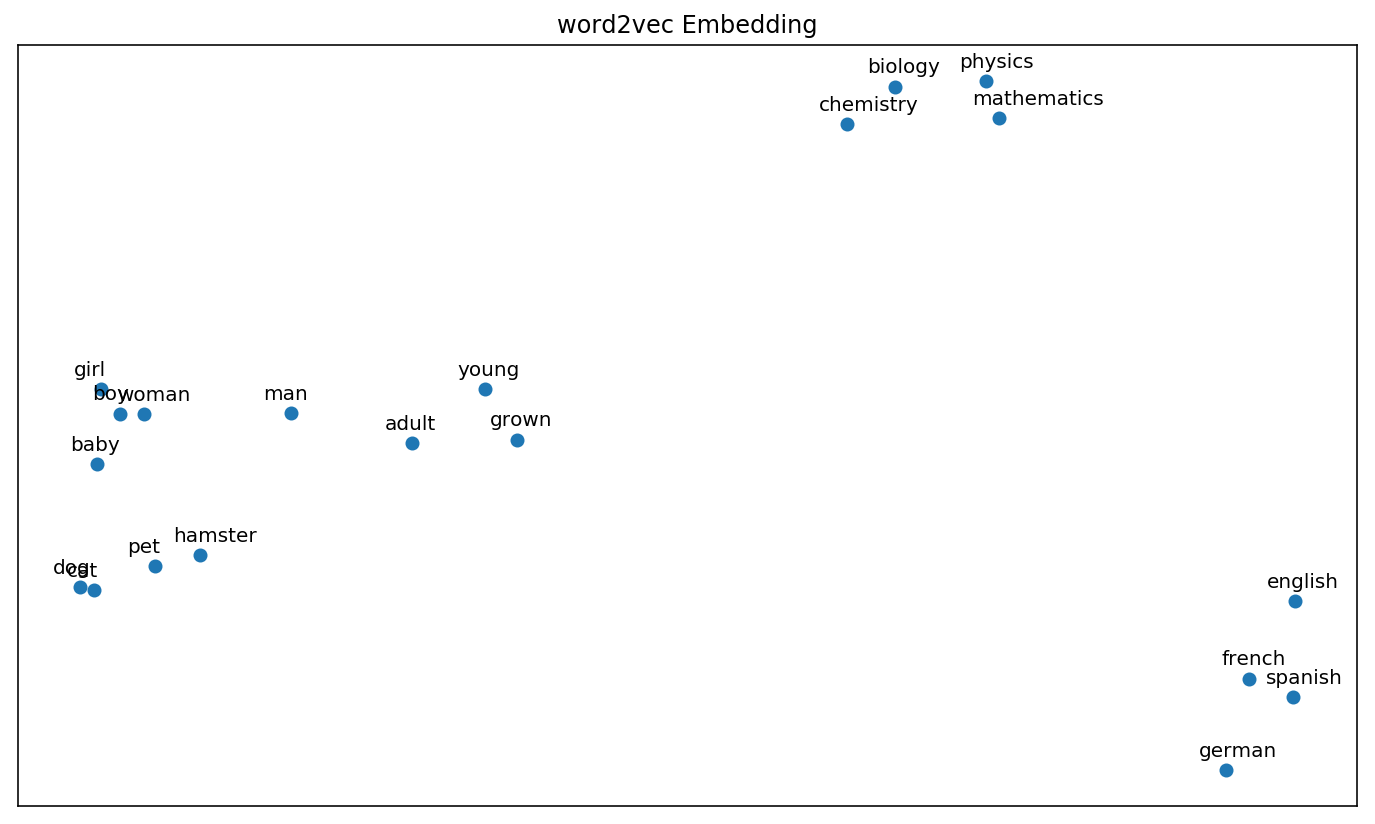

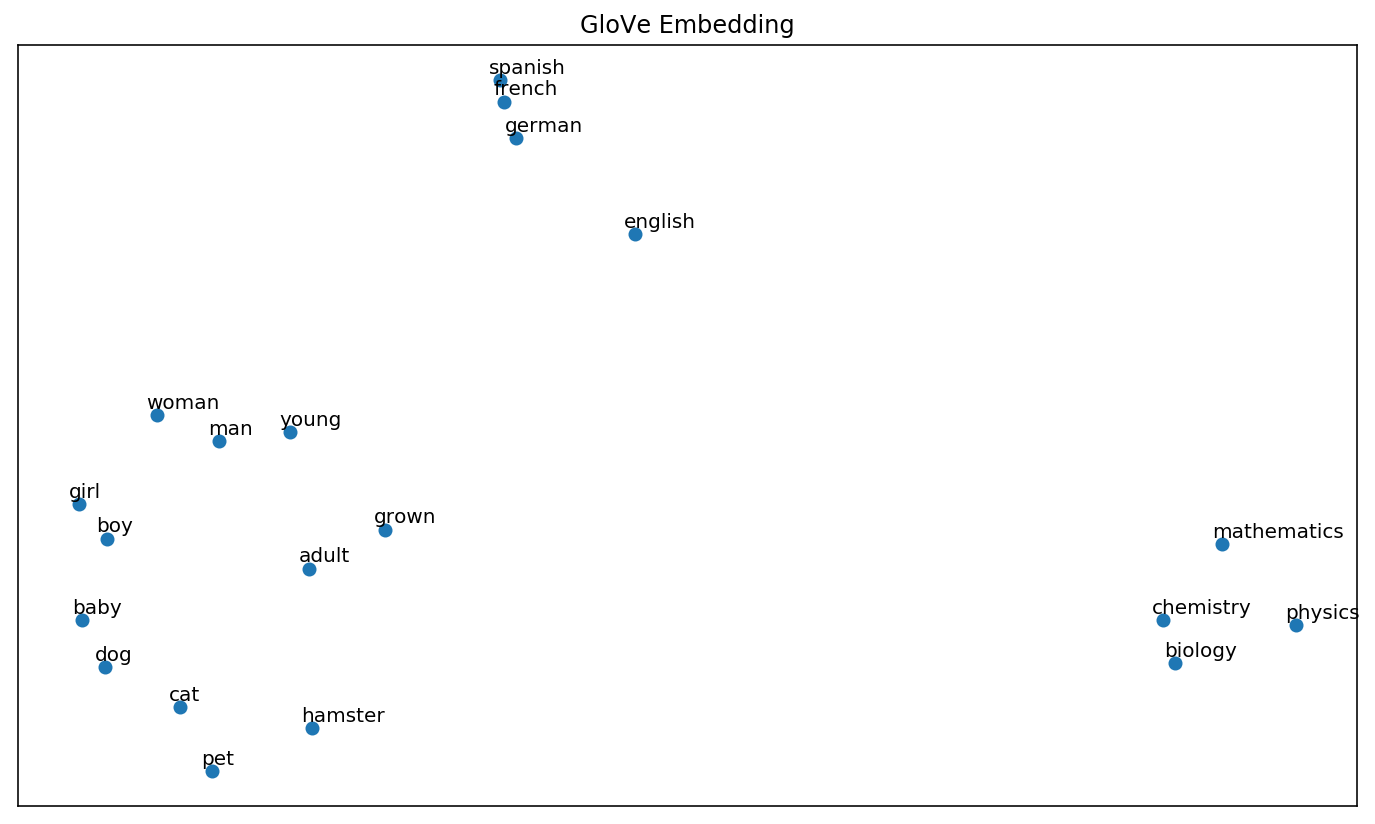

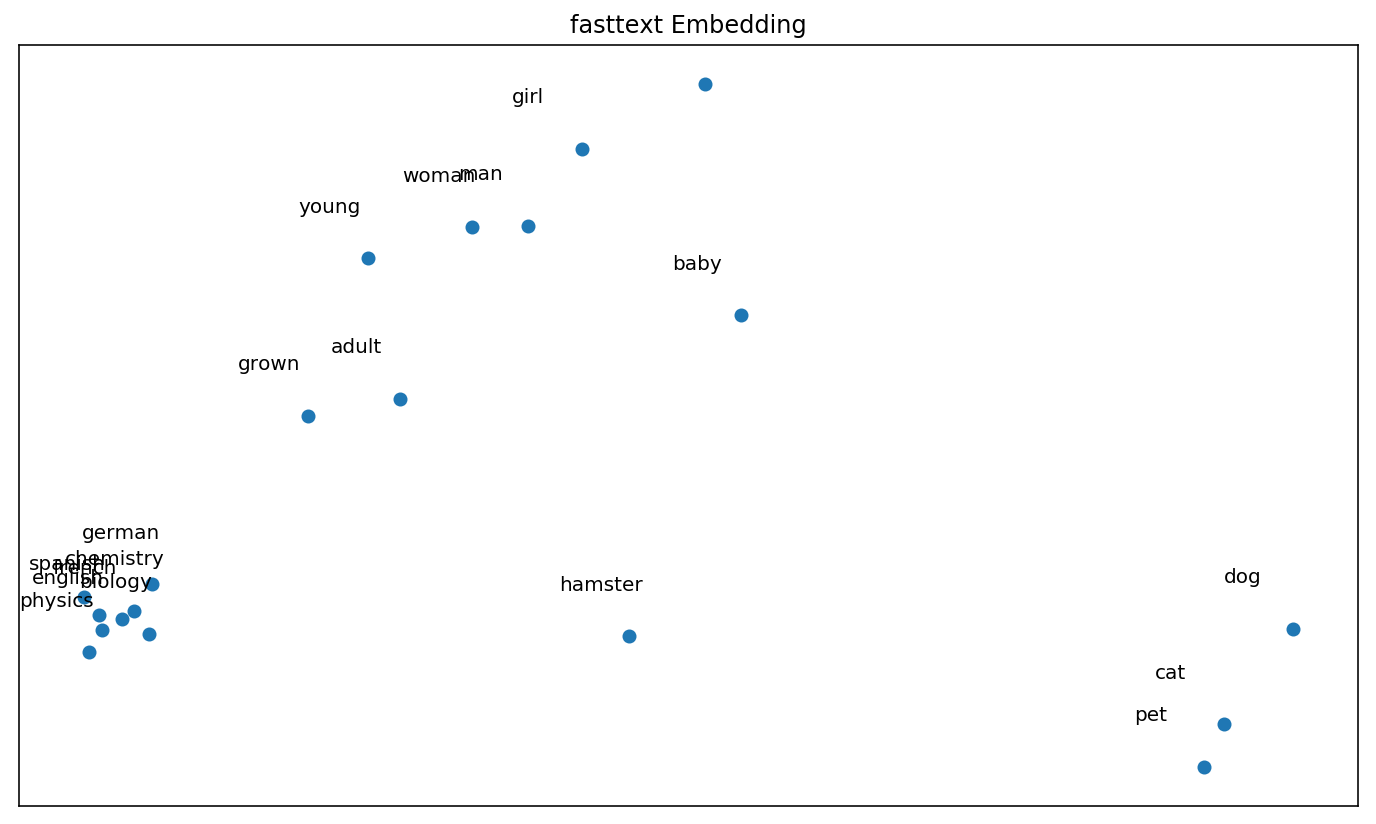

In [20]:
# Embedding that makes sense
plot_embeds(["dog", "cat", "hamster", "pet"] +                   # animals
            ["boy", "girl", "man", "woman"] +                    # humans
            ["grown", "adult", "young", "baby"] +                # age
            ["german", "english", "spanish", "french"] +         # languages
            ["mathematics", "physics", "biology", "chemistry"],  # natural sciences
            w2v,
            title = "word2vec Embedding") 

plot_embeds(["dog", "cat", "hamster", "pet"] +                   # animals
            ["boy", "girl", "man", "woman"] +                    # humans
            ["grown", "adult", "young", "baby"] +                # age
            ["german", "english", "spanish", "french"] +         # languages
            ["mathematics", "physics", "biology", "chemistry"],  # natural sciences
            glove,
            title = "GloVe Embedding") 

plot_embeds(["dog", "cat", "hamster", "pet"] +                   # animals
            ["boy", "girl", "man", "woman"] +                    # humans
            ["grown", "adult", "young", "baby"] +                # age
            ["german", "english", "spanish", "french"] +         # languages
            ["mathematics", "physics", "biology", "chemistry"],  # natural sciences
            fasttext,
            title = "fasttext Embedding") 

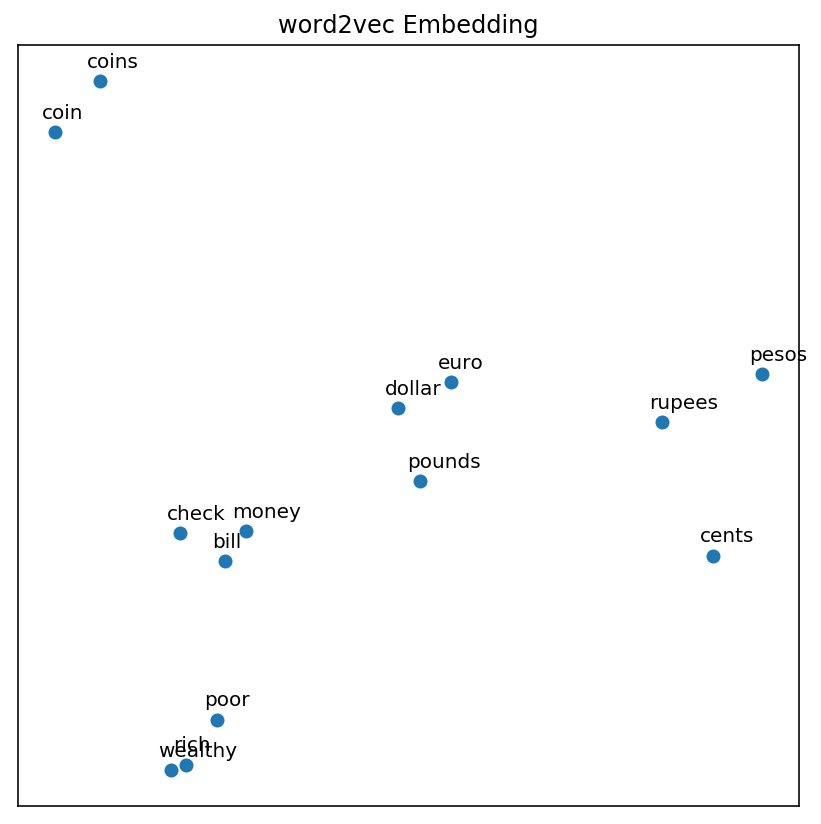

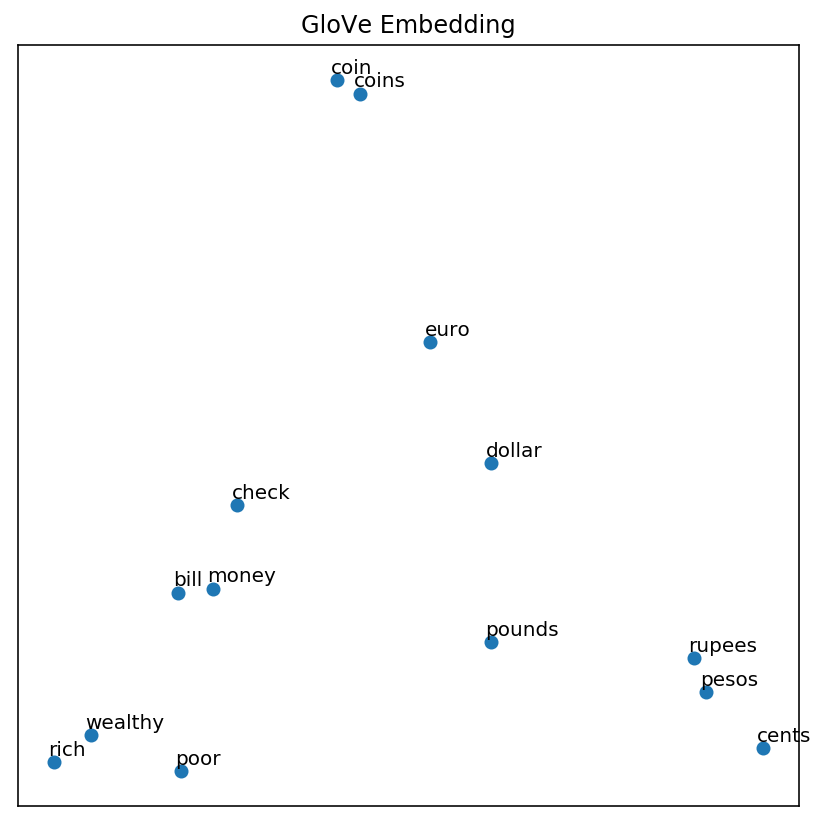

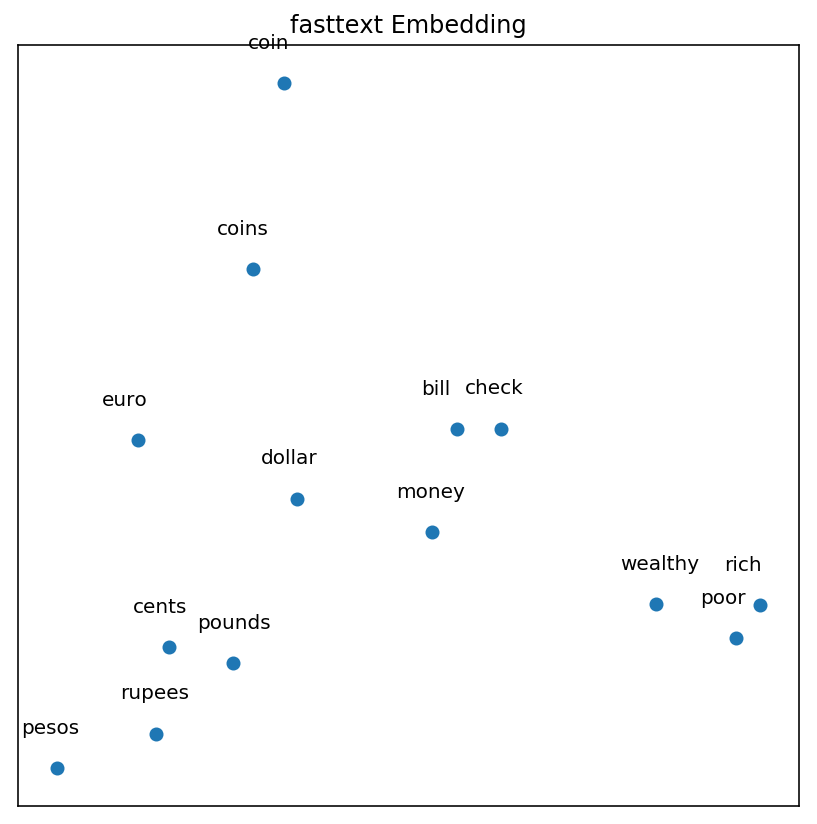

In [21]:
# embedding that we dont expect in a 2-dimensional space 
plot_embeds(["rich", "poor", "wealthy", "money"] + 
            ["coin", "coins", "dollar", "cents", "bill", "check", "rupees", "pesos", "euro", "pounds"],
            w2v,
            title = "word2vec Embedding",
            figsize = (7,7))

# embedding that we dont expect in a 2-dimensional space 
plot_embeds(["rich", "poor", "wealthy", "money"] + 
            ["coin", "coins", "dollar", "cents", "bill", "check", "rupees", "pesos", "euro", "pounds"],
            glove,
            title = "GloVe Embedding",
            figsize = (7,7))

plot_embeds(["rich", "poor", "wealthy", "money"] + 
            ["coin", "coins", "dollar", "cents", "bill", "check", "rupees", "pesos", "euro", "pounds"],
            fasttext,
            title = "fasttext Embedding",
            figsize = (7,7))

In [ ]:
def plot_embeds(word_list, word_embeddings = None, figsize = (12,7)) :
    # pca on the embedding
    pca = PCA(n_components=2)
    X = pca.fit_transform(word_vectors[word_list])
    
    ax = plt.figure(figsize=figsize)
    ax.subplots()
    _ = plt.scatter(X[:,0], X[:,1])
    for label, point in list(zip(word_list, X)):
        _ = plt.annotate(label, (point[0] - 0.075, point[1] + 0.075))
    # Turn off tick labels
    plt.xticks([])
    plt.yticks([])
    
def find_most_similar (vec, words = None) :
    # vec: resulting vector from word Arithmetic
    # words: list of words that comprise vec
    s = word_vectors.similar_by_vector(vec, topn = 10)
    # filter out words like "king" and "man", or else they will be included in the similarity
    if (words != None) :
      word_sim = list(filter(lambda x: (x[0] not in words), s))[:3]
    else :
      return (s[:3])
    return (word_sim)